# Predicting house prices: a regression example
predicting a continuous value instead of a discrete label: for instance, predicting the temperature tomorrow,
given meteorological data; or predicting the time that a software project will take to complete, given its specifications.

In [4]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [9]:
print(train_data.shape)
print(test_data.shape)
train_targets[:10]

(404, 13)
(102, 13)


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

## Preparing the data
Each features have different range -> problematic for neural network

-> **Feature-wise normalization** -> feature will be centered around 0 and has a unit standard deviation.

### Normalizing the data

In [14]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)

train_data /= std

test_data -= mean
test_data /= std

## Building your network
Because we have few examples -> use small network as one way to mitigate overfitting.

In [17]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()

    model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

The last layer is linear layer (have no activation)

mae: Mean Absolute Error

## Validating your approach using K-fold validation
Because we only have few examples.

In [34]:
import numpy as np

k = 4
num_val = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val: (i+1) * num_val]
    val_target = train_targets[i * num_val: (i+1) * num_val]
    
    partial_train_data = np.concatenate([train_data[:i * num_val], train_data[(i + 1) * num_val:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val], train_targets[(i+1)*num_val:]], axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    # val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)

    # all_scores.append(val_mae)
all_mae_histories.append(history.history['mean_absolute_error'])
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


## Ploting validation scores

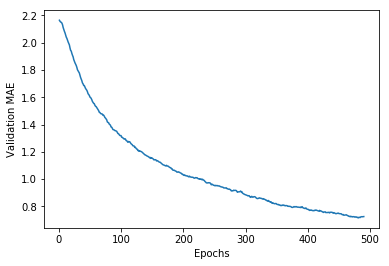

In [37]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Retraining the model

In [38]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [39]:
test_mae_score

41.52011744181315